In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("titanic_toy.csv")

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [10]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [11]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

In [12]:
X_train['Fare_999'] = X_train['Age'].fillna(999)
X_train['Fare_minus1'] = X_train['Age'].fillna(-1)

In [14]:
print("Orginal Age Variable Variance: ", X_train['Age'].var())
print("Age Variance after 99 imputation: ", X_train['Age_99'].var())
print("Age variance after -1 imputation:", X_train['Age_minus1'].var())

print("Orginal Fare variabe variance: ", X_train['Fare'].var())
print("Fare Variance after 999 imputation: ", X_train['Fare_999'].var())
print("Fare Variance after -1 imputation: ", X_train['Fare_minus1'].var())

Orginal Age Variable Variance:  204.34951339046142
Age Variance after 99 imputation:  951.7275570187188
Age variance after -1 imputation: 318.0896202624488
Orginal Fare variabe variance:  2448.1979137063163
Fare Variance after 999 imputation:  155054.41209691347
Fare Variance after -1 imputation:  318.0896202624488


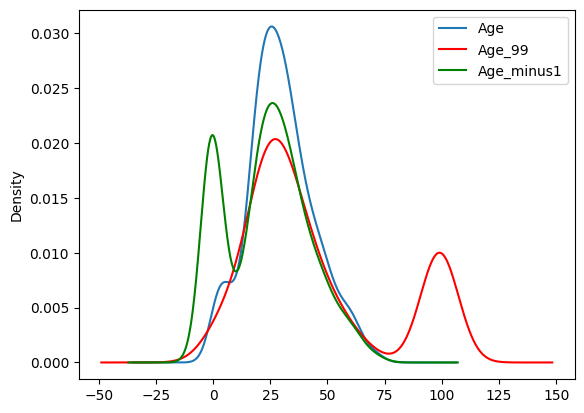

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original variable distribution
X_train['Age'].plot(kind='kde', ax = ax)

# Variable imputed with the median
X_train['Age_99'].plot(kind = 'kde', ax = ax, color='red')

# Variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color = "green")

#Add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')
plt.show()

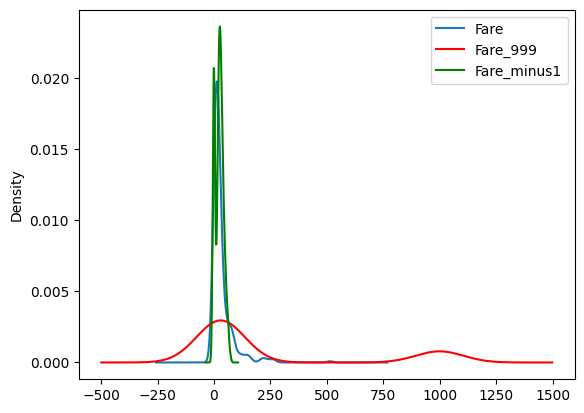

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original variable distribution
X_train['Fare'].plot(kind='kde', ax = ax)

# Variable imputed with the median
X_train['Fare_999'].plot(kind = 'kde', ax = ax, color='red')

# Variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color = "green")

#Add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')
plt.show()

In [20]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,204.349513,204.349513
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,-2146.736242,125.558364
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,-36.529656,-4.149246
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,11223.095428,-189.535540
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,-4758.161980,318.089620
Fare_999,204.349513,-2146.736242,-36.529656,11223.095428,-4758.161980,155054.412097,-4758.161980
Fare_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,-4758.161980,318.089620


In [21]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,1.000000,1.000000
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,-0.109742,0.142022
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,-0.056093,-0.140668
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,0.923877,-0.344476
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,-0.677520,1.000000
Fare_999,1.000000,-0.109742,-0.056093,0.923877,-0.677520,1.000000,-0.677520
Fare_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,-0.677520,1.000000


# Using Sklearn

In [22]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [24]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
], remainder = 'passthrough')

In [25]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99


In [26]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [27]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [29]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [30]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]], shape=(712, 3))